![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [34]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


Vamos a hacer una gráfica con seaborn para darnos una mejor idea de nuestros datos.

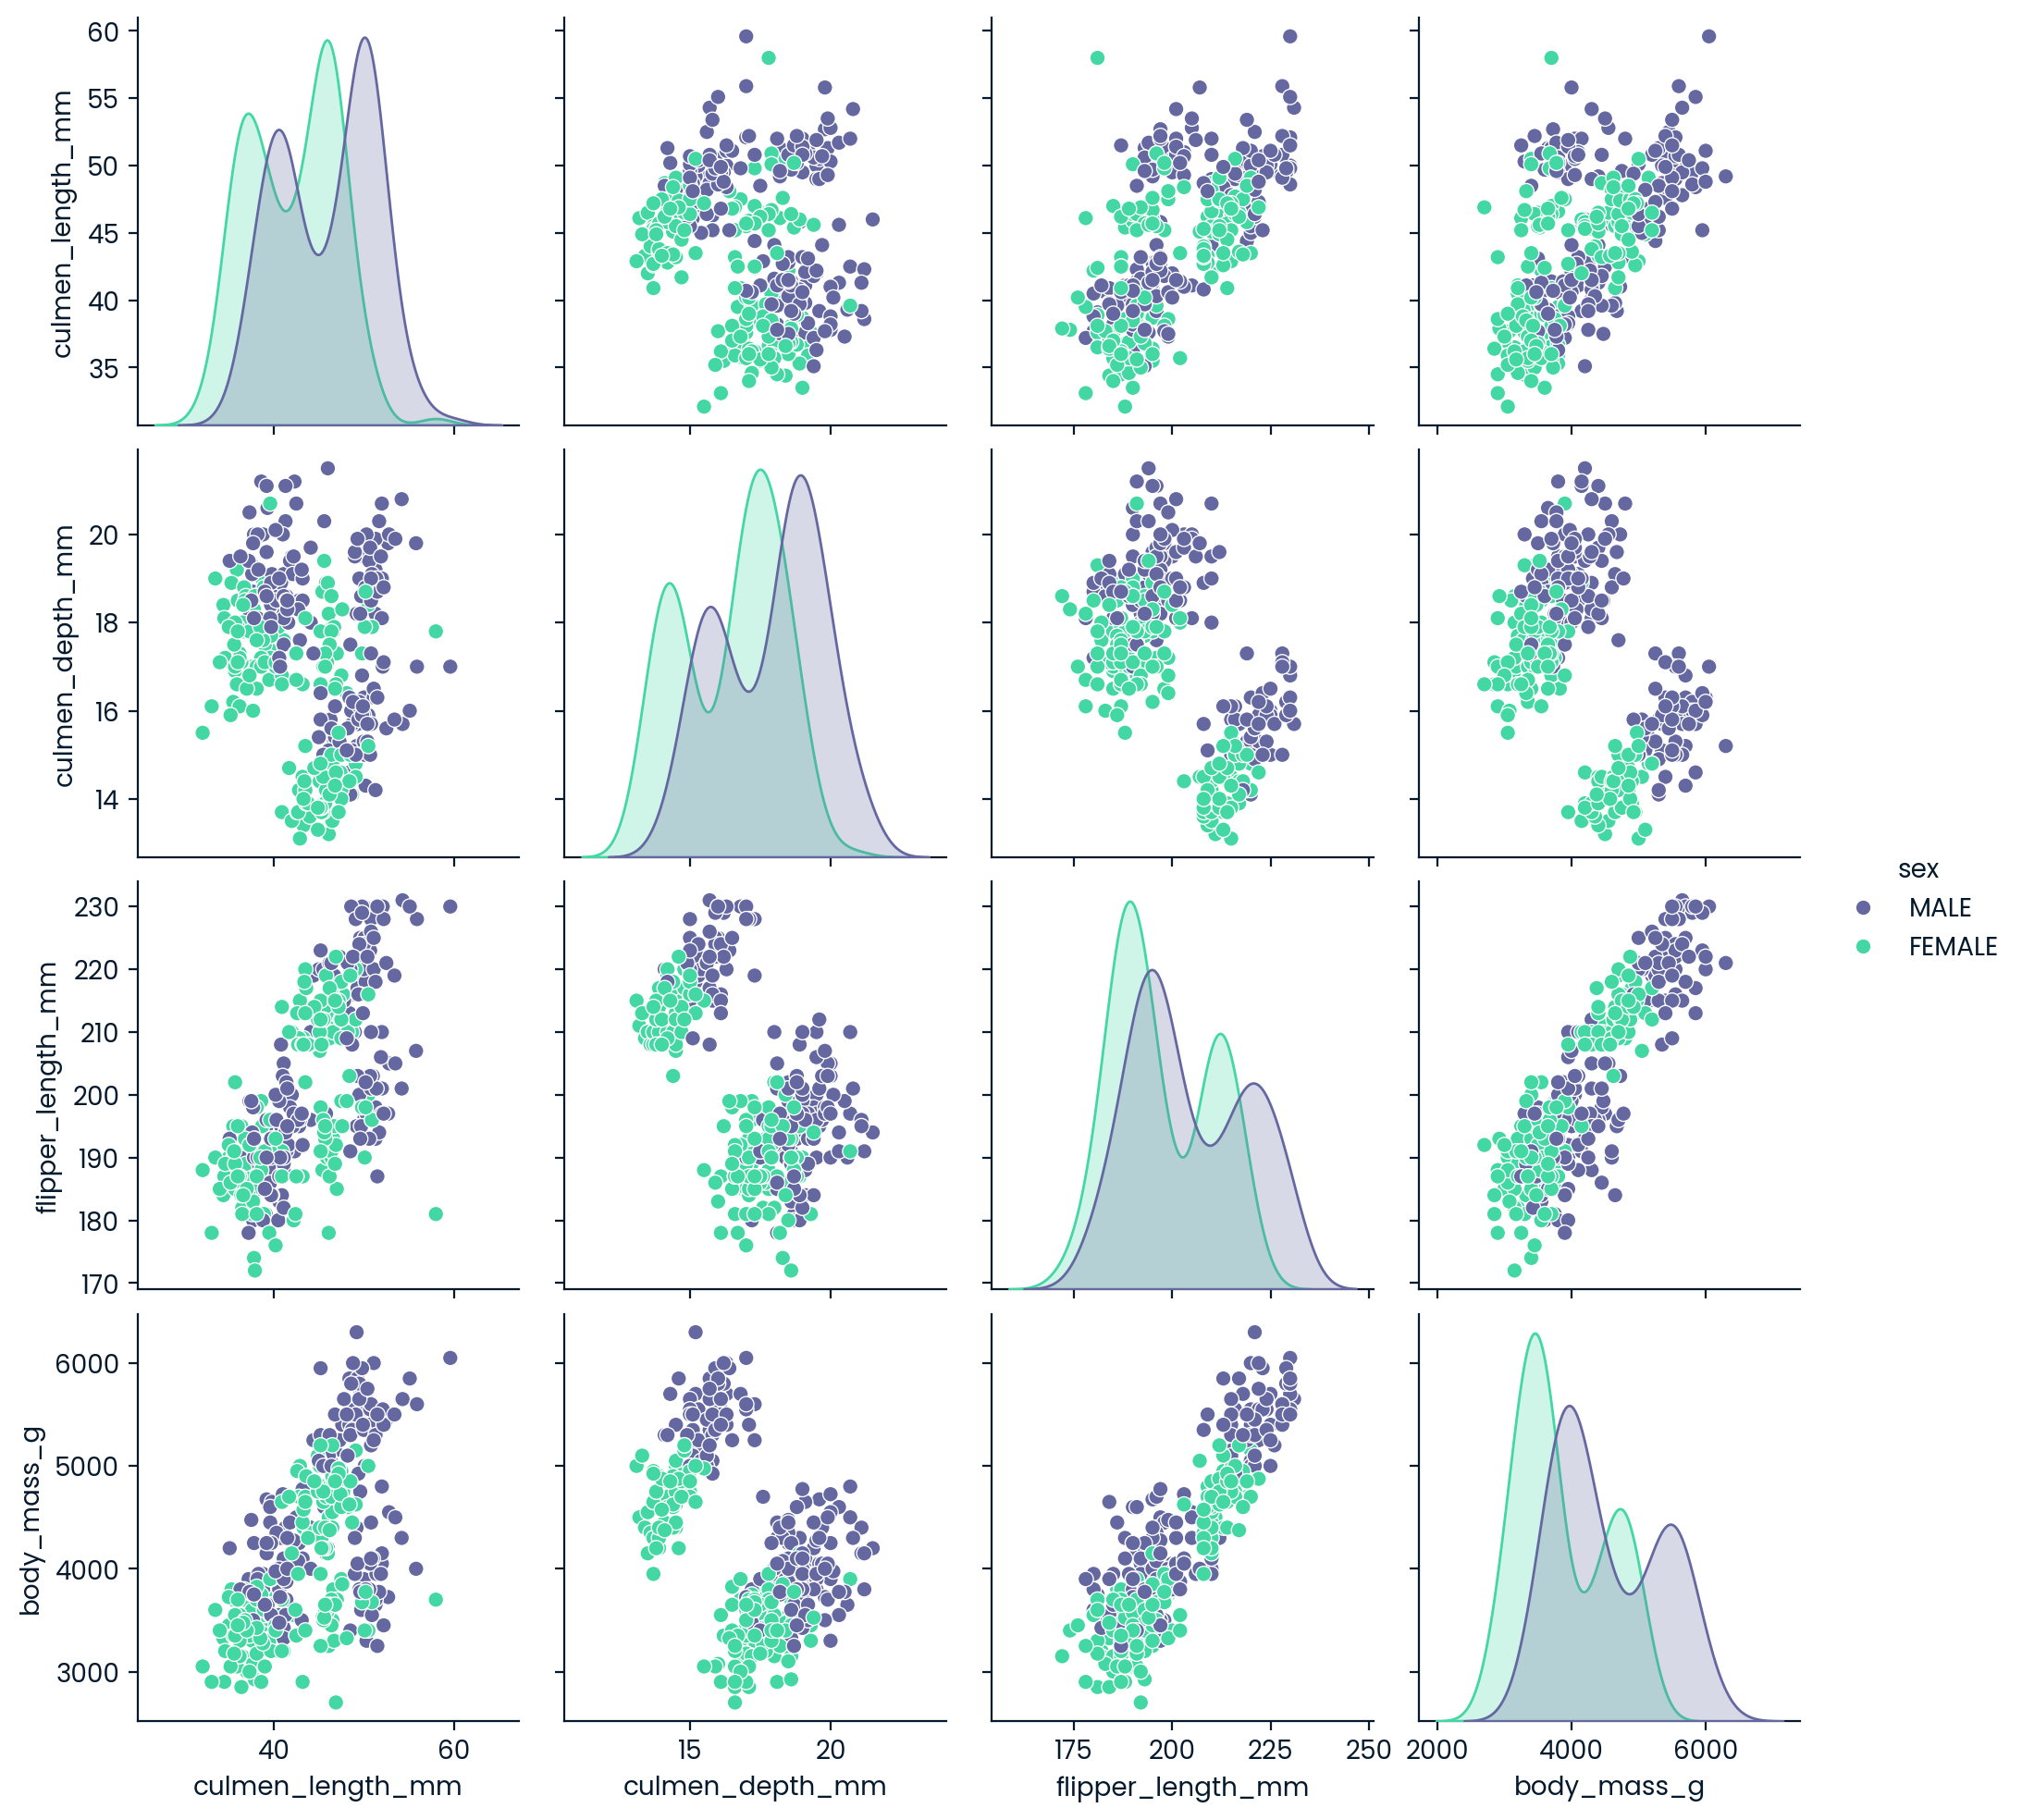

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(penguins_df, hue='sex')
plt.show()

Notamos que la variable sexo no distingue a nuestros datos de manera clara, por lo que no nos es util para distinguir a las espacies, vamos a deshacernos de ella.

In [36]:
penguins_df.drop('sex', axis=1, inplace=True)

Vamos a ver las estadísticas de estas variables con el fin de conocerlas mas nuestros datos y ver si requieren de una preparacion para hacer nuestro clustering.

In [37]:
penguins_df.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


Vemos que estan en rango de valores diferentes, por lo que conviene estandarizarlas. Usaremos el Standard Scaler.

In [38]:
sc = StandardScaler()
penguins_std = pd.DataFrame(sc.fit_transform(penguins_df), columns=penguins_df.columns)
penguins_std.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00


Ahora procederemos hacer kmeans sobre nuestros datos, como tenemos tres especies, esperamos encontrar tres clusters.

In [39]:
model = KMeans(n_clusters=3)
model.fit(penguins_std)
penguins_df['labels'] = model.labels_


A continuacion vamos a visualizar nuestro resultados, coloreamos por la etiqueta del clustering.

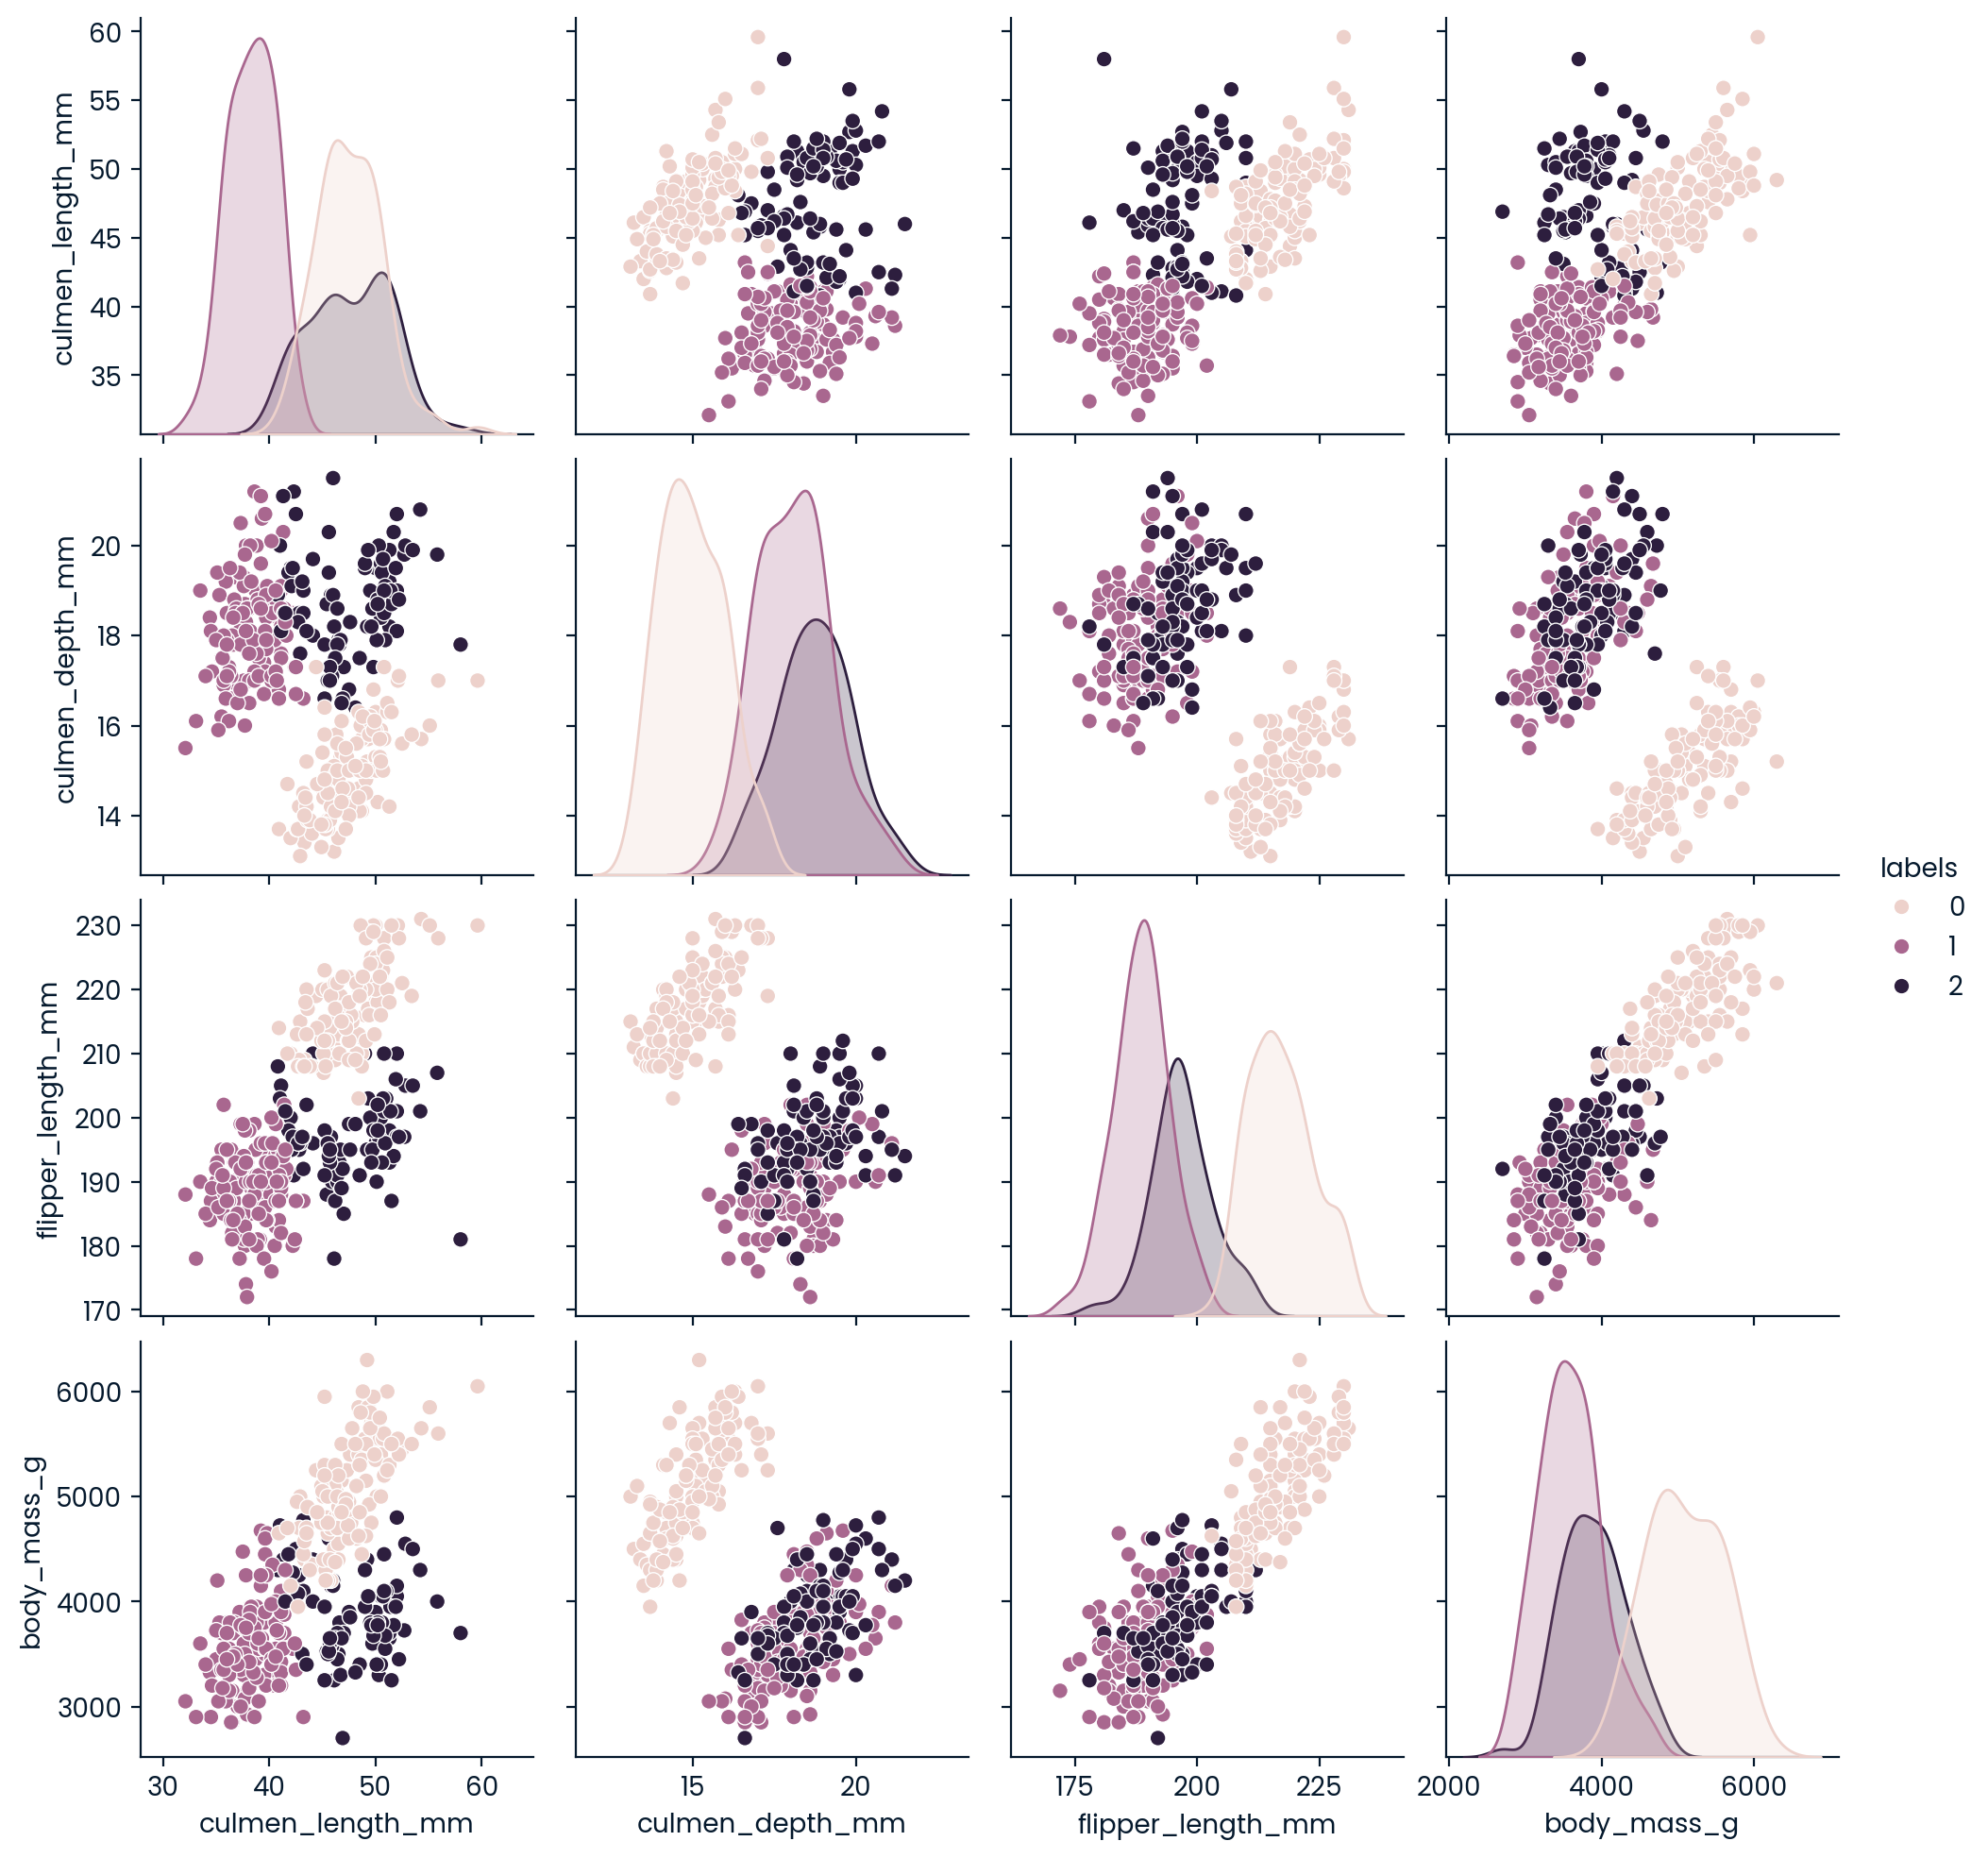

In [40]:
sns.pairplot(penguins_df, hue='labels')
plt.show()

Al parecer nuestro clustering funcionó de una forma excelente, se distingue muy bien que encontró los tres cluster que esperabamos, sin embargo no podemos saber a que especie corresponde cada cluster.

In [41]:
# Creando el dataset para la entrega
stat_penguins = penguins_df.groupby('labels').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
labels,,,,
0,47.568067,14.996639,217.235294,5092.436975
1,38.305469,18.098437,188.554688,3587.500000
2,47.662353,18.748235,196.917647,3898.235294
